In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 06 22:00:52 2017

@author: binoy
"""

import sys
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.layout import LAParams
from cStringIO import StringIO


def pdfparser(data):

    fp = file(data, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    # Create a PDF interpreter object.
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    # Process each page contained in the document.

    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        data =  retstr.getvalue()

    return data
    
with open('ken.txt','w') as f:
    f.write(pdfparser('Ken_resume.pdf'))

C:\Users\gli26\Anaconda2\lib\site-packages\ipykernel_launcher.py:203: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
C:\Users\gli26\Anaconda2\lib\site-packages\gensim\models\keyedvectors.py:443: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if word in self.vocab:


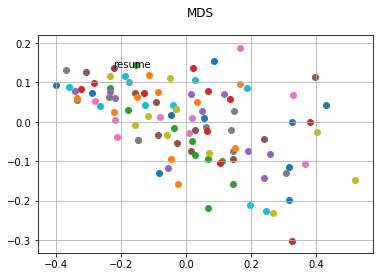

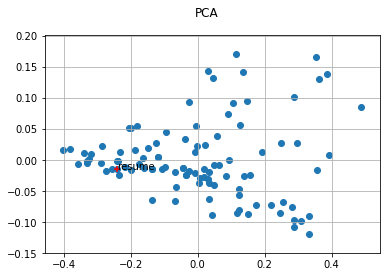

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 06 21:03:42 2017

@author: binoy
"""


import nltk
import gensim
import logging
#nltk.download('stopwords')
model = gensim.models.KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', 
    binary=True) 

#################

from __future__ import unicode_literals
from gensim.summarization import keywords
import pandas as pd 

import nltk
import string
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
import unicodedata
import math

df =pd.read_csv('data.csv')
df = df[:100]
jd = df['job_summary'].tolist()
companies = df['company'].tolist()
positions = df['jobtitle'].tolist()


class MyCountVectorizer:
    def __init__(self, docs):
        self.corpus = self.normalize_corpus(docs)
        self.make_features()
        self.make_matrix()
        
    def normalize_corpus(self, docs):    
        table = string.maketrans(string.punctuation, 
                                 len(string.punctuation) * ' ')
        norm_docs = []
        for doc_raw in docs:
            doc = filter(lambda x: x in string.printable, doc_raw)
            '''
            doc = ''
            for x in doc_raw:
                if x in string.printable:
                    doc += x
            '''
            doc = str(doc).translate(table).lower()
            norm_docs.append(doc)
        #self.corpus = norm_docs
        return norm_docs
        
    def make_features(self):
        ''' create vocabulary set from the corpus '''
        stopwords = nltk.corpus.stopwords.words('english')
        self.features = set()
        for doc in self.corpus:
            for word in doc.split():
                if word not in stopwords:
                    self.features.add(word)
        #self.features = set([word for doc in self.corpus for word in doc.split() if word not in stopwords])
        self.features = sorted(list(self.features))

    def make_matrix(self):
        self.matrix = []
        for doc in self.corpus:
            doc_vec = []
            for word in self.features:
                tf = self.term_freq(word, doc)
                doc_vec.append(tf)
            self.matrix.append(doc_vec)

    def term_freq(self, term, document):
        words = document.split()
        count = 0
        for word in words:
            if word == term:
                count += 1
        return count
    
    def print_matrix(self):
        for vec in self.matrix:
            print(vec)

    def get_matrix(self):
        return self.matrix
    
    def get_features(self):
        return self.features
    
    def get_density(self):
        ''' get the density (# of non-zero elements / # all elements )'''
        counter = 0
        total = 0
        for row in self.matrix:
            for item in row:
                if item != 0:
                    counter += 1
                total += 1
        return 1.0 * counter / total
        


class MyTfIdfVectorizer(MyCountVectorizer):
    ''' inherits from MyCountVectorizer'''

    def make_matrix(self):
        'overriding method'
        self.matrix = []
        for doc in self.corpus:
            doc_vec = []
            for word in self.features:
                tf = self.term_freq(word, doc)
                idf = self.inverse_document_freq(word)
                doc_vec.append(tf * idf)
            #self.matrix.append(doc_vec)
            total = sum(doc_vec)
            doc_vec_norm = [i/total for i in doc_vec]
            self.matrix.append(doc_vec_norm)

    def inverse_document_freq(self, term):
        doc_count = 0
        for document in self.corpus:
            term_count = self.term_freq(term, document)
            if term_count > 0:
                doc_count += 1
        return math.log( 1.0 * len(self.corpus) / doc_count)

def plot_mds(mean_vec):   
   from sklearn.manifold import MDS
    
   data = mean_vec
   mds = MDS(n_components=2, random_state=1)
   pos = mds.fit_transform(data)
   xs,ys = pos[:,0], pos[:,1]
   for x, y in zip(xs, ys):
       plt.scatter(x, y)
    #    plt.text(x, y, name)
    #pos2 = mds.fit_transform(model.infer_vector(resume))
    #xs2,ys2 = pos2[:,0], pos2[:,1]
   plt.scatter(xs[-1], ys[-1], c='Red', marker='+')
   plt.text(xs[-1], ys[-1],'resume')
   plt.suptitle('MDS')
   plt.grid()
   plt.savefig('distance_MDS_improved.png')
   plt.show()

def plot_pca(meav_vec):
    from sklearn.decomposition import PCA
    data = mean_vec
    pca = PCA(n_components=2) #, whiten=True
    X = pca.fit_transform(data)
    xs,ys =X[:,0], X[:,1]
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(xs[-1], ys[-1], c='Red', marker='+')
    plt.text(xs[-1], ys[-1],'resume')
    plt.grid()
    plt.suptitle('PCA')
    plt.savefig('distance_PCA_improved.png')
    plt.show()

       
with open('ken.txt','r') as f:
    resume = f.read()
jd.append(resume)
myvec = MyTfIdfVectorizer(jd)




# Logging code taken from http://rare-technologies.com/word2vec-tutorial/
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

#==================================
# WARNING: if your computer memory is small, this won't work.
#=================================

    

stopwords = nltk.corpus.stopwords.words('english')

imp = ['java']
p = string.punctuation
d = string.digits
table_p = string.maketrans(p, len(p) * " ")
table_d = string.maketrans(d, len(d) * " ")
vec = []
for j in jd:
    #each job description
    x = j.translate(table_p)
    y = x.translate(table_d)
    jd_vector = []
    i = 0
    for word in y.split():
        if word.lower() not in stopwords and len(word)>1 and word not in imp:
            try:
                x = model[word]
                idx = myvec.get_features().index(word)
                z = myvec.get_matrix()[i][idx]
                lst = [a * z for a in x]
                jd_vector.append(lst)
            except:
                continue
        else:
            try:
                x = model[word]
                lst = [a * 2 for a in x]
                jd_vector.append(lst)
            except:
                continue
    i+=1
    vec.append(jd_vector)
    
mean_vec = []
for j in vec:
    mean = []
    for i in range(len(df)):
        accum =0
        for word in j:
            accum += word[i]
        mean.append(1.0*accum/len(word))
    mean_vec.append(mean)
data = mean_vec

plot_mds(mean_vec)
plot_pca(mean_vec)

from sklearn.metrics.pairwise import cosine_distances
import numpy as np

data = np.asarray(data)
#data= data.reshape(1,-1)
cos_dist =[]
for vec in data[:-1]:
    vec = vec.reshape(1,-1) 
    cos_dist.append(float(cosine_distances(vec,data[-1].reshape(1,-1))))
    

ps = PorterStemmer()
key_list =[]

for j in jd[:-1]:
    key = ''
    w = set()
    for word in keywords(j).split('\n'):
        w.add(ps.stem(word))
    for x in w:
        key += '{} '.format(x)
    key_list.append(key)





summary = pd.DataFrame({
        'Company': companies,
        'Postition': positions,
        'Cosine Distances': cos_dist,
        'Keywords': key_list,
        'Job Description': jd[:-1]
    })
z =summary.sort_values('Cosine Distances', ascending=False)
z.to_csv('Summaryimproved.csv',encoding="utf-8")



In [20]:
my_test = MyTfIdfVectorizer(jd[:2])

In [22]:
my_test.get_features()

['000',
 '100',
 '12',
 '18',
 '2',
 '21',
 '3',
 '4',
 '5',
 '50',
 'ability',
 'able',
 'accelerate',
 'acceptance',
 'access',
 'accident',
 'accommodation',
 'accommodations',
 'according',
 'accredited',
 'accuracy',
 'action',
 'add',
 'additional',
 'address',
 'adequate',
 'affiliation',
 'age',
 'agency',
 'aic',
 'alignment',
 'along',
 'alpha',
 'also',
 'analyses',
 'analyst',
 'analyze',
 'analyzing',
 'ancestry',
 'another',
 'applicable',
 'applicant',
 'applicants',
 'apply',
 'appropriate',
 'approving',
 'around',
 'array',
 'assets',
 'assigned',
 'assignment',
 'assist',
 'assists',
 'assurance',
 'attends',
 'attention',
 'auditory',
 'auto',
 'automated',
 'automation',
 'away',
 'b',
 'bachelor',
 'bachelors',
 'background',
 'backgrounds',
 'bend',
 'benefit',
 'benefits',
 'beta',
 'birth',
 'bug',
 'build',
 'building',
 'business',
 'c',
 'calculates',
 'calculations',
 'candidates',
 'cannot',
 'care',
 'career',
 'caring',
 'carry',
 'case',
 'cases',
 'cas